# Format datasets

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats


yearS=[]
yearStrikes=[]

i = 1987 
while i < 2019:
    file = str(i)+"_data.csv"
    data = pd.read_csv(file)

    datetmp=data.day.str.replace("-"," ")
    year=datetmp.str.split(" ",expand=True)[0]
    month=datetmp.str.split(" ",expand=True)[1]
    day=datetmp.str.split(" ",expand=True)[2]
    
    loctmp=data.center_point.str.replace("POINT\(","")
    loctmp=loctmp.str.replace("\)","")
    latitude=loctmp.str.split(" ",expand=True)[0]
    longitude=loctmp.str.split(" ",expand=True)[1]
    
    strikes=data.number_of_strikes
    
    data['Year']=year.astype(int)
    data['Month']=month.astype(int)
    data['Day']=day.astype(int)
    data['Latitude']=latitude.astype(float)
    data['Longitude']=longitude.astype(float)
    data['LatitudeR']=latitude.astype(float).round(0)
    data['LongitudeR']=longitude.astype(float).round(0)
    data['Strikes']=strikes.astype(int)
    
    outfile = str(i)+"_mod.csv"
    data.to_csv(outfile, index=False, header=True) 
    
    i = i + 1

# Calculating total number of strikes since 1987

In [ ]:
YearSum=[]
Ystrikes=[]

i = 1987 
while i < 2019:
    file = str(i)+"_mod.csv"
    data = pd.read_csv(file)
    
    grouped_df=data.groupby('Year')

    YearSum.append(grouped_df['Year'].mean()[i])
    Ystrikes.append(grouped_df['Strikes'].sum()[i])
    
    i = i + 1


grouped_df['Strikes'].sum()
summary_table = pd.DataFrame({"Year": YearSum,
                                    "number_of_strikes": Ystrikes}) 

summary_table.to_csv("summary_table.csv", index=False, header=True) 


In [3]:

data=summary_table
data['number_of_strikes(million)']=round(data['number_of_strikes']/1000000,2)
data.head()


,Year,number_of_strikes,number_of_strikes(million)
0,1987,7378836,7.38
1,1988,9150440,9.15
2,1989,14245186,14.25
3,1990,15839052,15.84
4,1991,16900934,16.90


In [4]:
# Load Library
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

# Visualizing number of strikes during each year

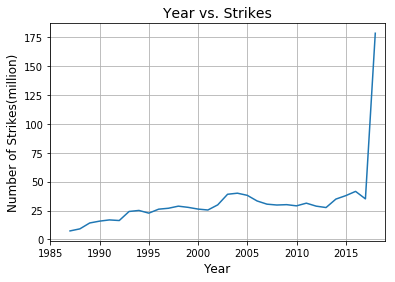

In [19]:
data.plot.line(x="Year",y="number_of_strikes(million)",legend=False)
plt.title("Year vs. Strikes", fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Number of Strikes(million)",fontsize=12)
plt.xlim(1985,2019)
plt.grid()
plt.savefig("Images/YearStrikes.png",dpi=300)
plt.show()

# Comparing number of strikes across different latitudes between 1987 and 2017

In [9]:
# Read in datasets 
d87 = pd.read_csv("1987_mod.csv")
d17 = pd.read_csv("2017_mod.csv")

In [11]:
group_87_lat=d87.groupby('LatitudeR')
lat87=group_87_lat['LatitudeR'].mean()
strike87_lat=round(group_87_lat['Strikes'].sum()/1000)
strike87_lat_max=group_87_lat['Strikes'].max()

group_17_lat=d17.groupby('LatitudeR')
lat17=group_17_lat['LatitudeR'].mean()
strike17_lat=round(group_17_lat['Strikes'].sum()/1000)
strike17_lat_max=group_17_lat['Strikes'].max()

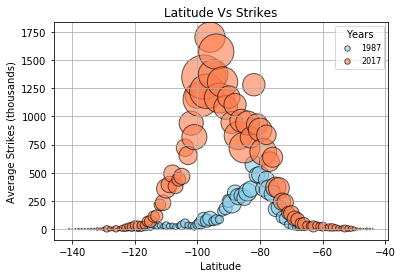

In [12]:
fig,axes = plt.subplots()

# Build the scatterplot for two years
plt.scatter(lat87, strike87_lat, marker="o", facecolors="skyblue", label="1987",edgecolors="black", s=strike87_lat_max/1.2, alpha=0.62)
plt.scatter(lat17, strike17_lat, marker="o", facecolors="coral", label="2017",edgecolors="black", s=strike17_lat_max/1.2, alpha=0.62)
plt.grid()


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Average Strikes (thousands)")
plt.title("Latitude Vs Strikes")

# Create a legend
legend = plt.legend(fontsize = 8, title= "Years", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]


# Save Figure
plt.savefig("Images/Latitude_vs_strikes.png")

# Show Figure
plt.show()

# Comparing number of strikes across different longitudes between 1987 and 2017

In [113]:
group_87_lng=d87.groupby('LongitudeR')
lng87=group_87_lng['LongitudeR'].mean()
strike87_lng=round(group_87_lng['Strikes'].sum()/1000)
strike87_lng_max=group_87_lng['Strikes'].max()

group_17_lng=d17.groupby('LongitudeR')
lng17=group_17_lng['LongitudeR'].mean()
strike17_lng=round(group_17_lng['Strikes'].sum()/1000)
strike17_lng_max=group_17_lng['Strikes'].max()

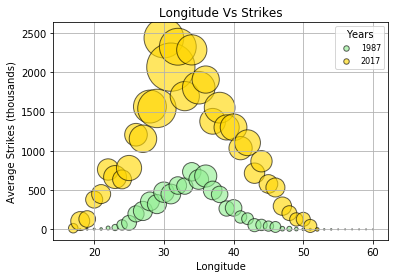

In [114]:
fig,axes = plt.subplots()

# Build the scatterplot for two years
plt.scatter(lng87, strike87_lng, marker="o", facecolors="lightgreen", label="1987",edgecolors="black", s=strike87_lng_max, alpha=0.62)
plt.scatter(lng17, strike17_lng, marker="o", facecolors="gold", label="2017",edgecolors="black", s=strike17_lng_max, alpha=0.62)
plt.grid()


# Incorporate the other graph properties
plt.xlabel("Longitude")
plt.ylabel("Average Strikes (thousands)")
plt.title("Longitude Vs Strikes")

# Create a legend
legend = plt.legend(fontsize = 8, title= "Years", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]


# Save Figure
plt.savefig("Images/Longitude_vs_strikes.png")

# Show Figure
plt.show()

# Comparing the number of strikes in each month during 1987 and 2017

In [15]:
group_87_m=d87.groupby('Month')
m87=group_87_m['Month'].mean()
strike87_m=round(group_87_m['Strikes'].sum()/1000)
#strike87_m_max=group_87_m['Strikes'].max()

group_17_m=d17.groupby('Month')
m17=group_17_m['Month'].mean()
strike17_m=round(group_17_m['Strikes'].sum()/1000)
#strike17_m_max=group_17_m['Strikes'].max()

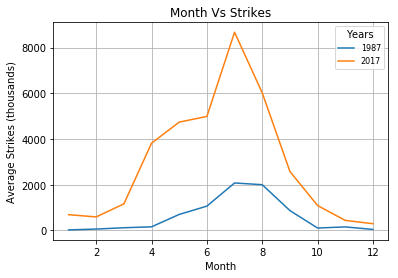

In [16]:
fig,axes = plt.subplots()

# Build the scatterplot for two years
plt.plot(m87, strike87_m, label="1987" )
plt.plot(m17, strike17_m, label="2017")
plt.grid()


# Incorporate the other graph properties
plt.xlabel("Month")
plt.ylabel("Average Strikes (thousands)")
plt.title("Month Vs Strikes")

# Create a legend
legend = plt.legend(fontsize = 8, title= "Years", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]


# Save Figure
plt.savefig("Images/Month_vs_strikes.png")

# Show Figure
plt.show()

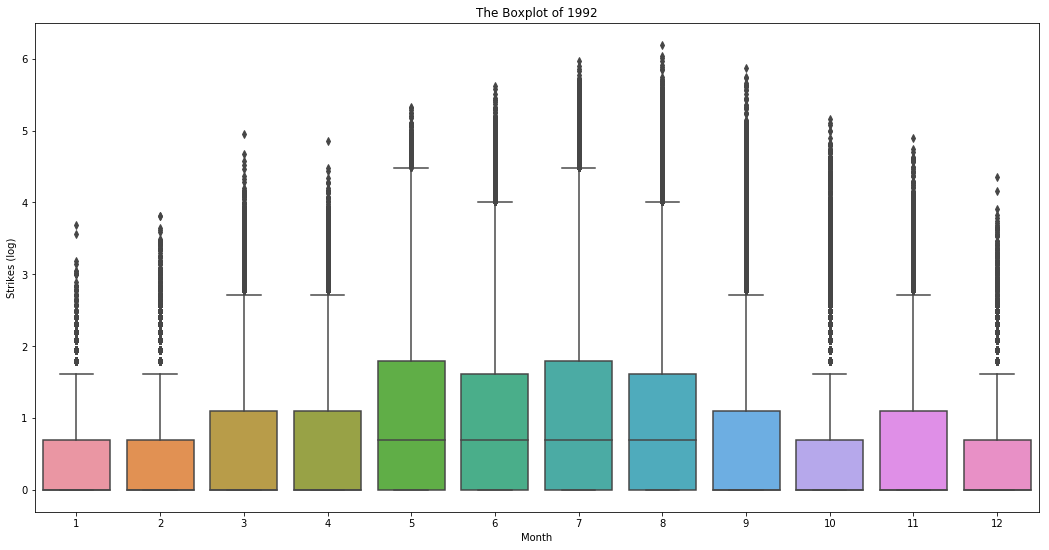

In [110]:
import numpy as np
plt.figure(figsize=(18,9))
info87=d87[['Month', "Strikes"]]
info87.Strikes=np.log(info87.Strikes)
sns.boxplot(x="Month",y="Strikes",data=info87)
plt.ylabel("Strikes (log)")
plt.title("The Boxplot of 1992")

# Save Figure
plt.savefig("Images/The Boxplot of 1992.png")

# Show Figure
plt.show()


#####  Visualizing the number of strikes at different locations during each month of 1992 and 2017


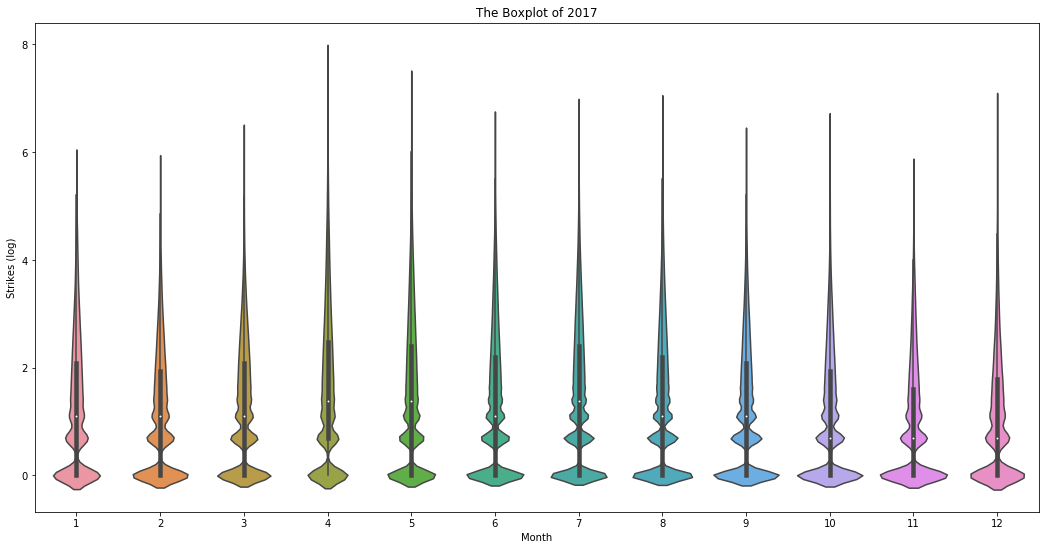

In [112]:
plt.figure(figsize=(18,9))
info17=d17[['Month', "Strikes"]]
info17.Strikes=np.log(info17.Strikes)

sns.violinplot(x="Month", y="Strikes", data=info17)
plt.ylabel("Strikes (log)")
plt.title("The Boxplot of 2017")

# Save Figure
plt.savefig("Images/The ViolinPlot of 2017.png",dpi=300)

# Show Figure
plt.show()

# Statistical analysis of different in quantity of strikes between 1987 and 2017

## T-test analysis

In [115]:
data87=pd.concat([strike87_m,m87],axis=1)
data87=data87.reset_index(drop=True)

data17=pd.concat([strike17_m,m17],axis=1)
data17=data17.reset_index(drop=True)
# T-test between these two years
stats.ttest_ind(data87["Strikes"],data17["Strikes"],equal_var=False)

Ttest_indResult(statistic=-2.8389165218500874, pvalue=0.014239012796034685)

### Performing the ANOVA analysis of 1987 and 2017

In [132]:
# Extract individual groups
group1_87=d87[d87["Month"]==1]["Strikes"]
group2_87=d87[d87["Month"]==2]["Strikes"]
group3_87=d87[d87["Month"]==3]["Strikes"]
group4_87=d87[d87["Month"]==4]["Strikes"]
group5_87=d87[d87["Month"]==5]["Strikes"]
group6_87=d87[d87["Month"]==6]["Strikes"]
group7_87=d87[d87["Month"]==7]["Strikes"]
group8_87=d87[d87["Month"]==8]["Strikes"]
group9_87=d87[d87["Month"]==9]["Strikes"]
group10_87=d87[d87["Month"]==10]["Strikes"]
group11_87=d87[d87["Month"]==11]["Strikes"]
group12_87=d87[d87["Month"]==12]["Strikes"]

In [133]:
# Perform the ANOVA 0f 1987
stats.f_oneway(group1_87, group2_87, group3_87, group4_87, group5_87, group6_87, group7_87, 
               group8_87, group9_87, group10_87, group11_87, group12_87)

F_onewayResult(statistic=2550.8123940717496, pvalue=0.0)

In [135]:
# Extract individual groups
group1_17=d17[d17["Month"]==1]["Strikes"]
group2_17=d17[d17["Month"]==2]["Strikes"]
group3_17=d17[d17["Month"]==3]["Strikes"]
group4_17=d17[d17["Month"]==4]["Strikes"]
group5_17=d17[d17["Month"]==5]["Strikes"]
group6_17=d17[d17["Month"]==6]["Strikes"]
group7_17=d17[d17["Month"]==7]["Strikes"]
group8_17=d17[d17["Month"]==8]["Strikes"]
group9_17=d17[d17["Month"]==9]["Strikes"]
group10_17=d17[d17["Month"]==10]["Strikes"]
group11_17=d17[d17["Month"]==11]["Strikes"]
group12_17=d17[d17["Month"]==12]["Strikes"]

In [136]:
# Perform the ANOVA 0f 2017
stats.f_oneway(group1_17, group2_17, group3_17, group4_17, group5_17, group6_17, group7_17, 
               group8_17, group9_17, group10_17, group11_17, group12_17)

F_onewayResult(statistic=3149.9130038430103, pvalue=0.0)

## Generating Heatmap of the number of strikes in locations across the U.S. in 1992

In [27]:
# load libraries
import json
import requests
import pandas as pd
import numpy as np
from config import api_key

from census import Census
import gmaps
import time
from us import states

In [53]:
# Read our Data file with the pandas library
data1992=pd.read_csv("1992.csv")

# Extract Latitude and Longitude from DataFrame
loc1992=data1992.center_point.str.extract('(-?\d*\.?\d?) (\d*\.?\d?)')  

# Add latitude and longitude information to original data. And convert the datatype.
data1992['lat']=loc1992[1].astype(float)
data1992['lng']=loc1992[0].astype(float)


# Extract unique locations
locates1992=loc1992.drop_duplicates()
locates1992.columns=['lon','lat']

lon1992=locates1992.iloc[0,0]
lat1992=locates1992.iloc[0,1]

locates1992.head()

,lon,lat
0,-96.2,31.5
1,-79.1,31.5
2,-78.9,30.5
3,-77.8,29.7
4,-77.6,29.9


In [54]:
# Extract addresses from GoogleAPI and store in a file
lens=locates1992.shape[0]
file1=open('locations1992.txt',"w")

for i in range(lens):
    lon=locates1992.iloc[i,0]
    lat=locates1992.iloc[i,1]
    url="https://maps.googleapis.com/maps/api/geocode/json?latlng="+lat+","+lon+"&key="+api_key
    info=requests.get(url).json()
    address=info['results'][0]["formatted_address"]
    print ("The latitude is "+lat+ " ;the longitude is "+ lon+ ";the address is "+ address+"\n")
    file1.write(lon+"\t"+lat+"\t"+address+"\n")
file1.close()

The latitude is 31.5 ;the longitude is -96.2;the address is Rch Rd, Donie, TX 75838, USA

The latitude is 31.5 ;the longitude is -79.1;the address is Atlantic Ocean

The latitude is 30.5 ;the longitude is -78.9;the address is Atlantic Ocean

The latitude is 29.7 ;the longitude is -77.8;the address is Atlantic Ocean

The latitude is 29.9 ;the longitude is -77.6;the address is Atlantic Ocean

The latitude is 29.8 ;the longitude is -78.4;the address is Atlantic Ocean

The latitude is 28.8 ;the longitude is -91.8;the address is Gulf of Mexico

The latitude is 28.8 ;the longitude is -91.7;the address is Gulf of Mexico

The latitude is 26.8 ;the longitude is -95.6;the address is Gulf of Mexico

The latitude is 27.1 ;the longitude is -95.4;the address is Gulf of Mexico

The latitude is 29.2 ;the longitude is -90.1;the address is Golden Meadow, LA 70357, USA

The latitude is 29 ;the longitude is -90.5;the address is Gulf of Mexico

The latitude is 29.5 ;the longitude is -89.5;the address is 1,

The latitude is 28.5 ;the longitude is -82.1;the address is 38471 Richloam Clay Sink Rd, Webster, FL 33597, USA

The latitude is 31.1 ;the longitude is -82.3;the address is Unnamed Road, Waycross, GA 31503, USA

The latitude is 31.1 ;the longitude is -78.5;the address is Atlantic Ocean

The latitude is 31.1 ;the longitude is -78.4;the address is Atlantic Ocean

The latitude is 31.1 ;the longitude is -82.1;the address is 7891 Randall Crews Rd, Hoboken, GA 31542, USA

The latitude is 25.7 ;the longitude is -85;the address is Gulf of Mexico

The latitude is 26 ;the longitude is -84.4;the address is Gulf of Mexico

The latitude is 28.6 ;the longitude is -99.7;the address is FM 65, Crystal City, TX 78839, USA

The latitude is 29.8 ;the longitude is -98.8;the address is 10242 Johns Rd, Boerne, TX 78006, USA

The latitude is 28.4 ;the longitude is -99.8;the address is Asherton, TX 78827, USA

The latitude is 27.3 ;the longitude is -96;the address is Gulf of Mexico

The latitude is 27.7 ;the l

The latitude is 35.2 ;the longitude is -97.5;the address is 4887 Broad Acres Rd, Norman, OK 73072, USA

The latitude is 34.8 ;the longitude is -97.5;the address is Lindsay, OK 73052, USA

The latitude is 34.3 ;the longitude is -97.6;the address is 187237 OK-89, Loco, OK 73442, USA

The latitude is 33.6 ;the longitude is -97.8;the address is 4657 TX-59, Bowie, TX 76230, USA

The latitude is 34.3 ;the longitude is -96.7;the address is Unnamed Road, Tishomingo, OK 73460, USA

The latitude is 34.3 ;the longitude is -96.9;the address is Mannsville, OK 73447, USA

The latitude is 34.3 ;the longitude is -97;the address is 1 Riverside Rd, Ardmore, OK 73401, USA

The latitude is 35.3 ;the longitude is -97.4;the address is 17301 Chatham Hills Rd, Norman, OK 73071, USA

The latitude is 33.7 ;the longitude is -97.6;the address is Thompson Rd, St Jo, TX 76265, USA

The latitude is 34 ;the longitude is -97.7;the address is Grady, OK 73569, USA

The latitude is 35.3 ;the longitude is -97.5;the addres

The latitude is 29.6 ;the longitude is -91.6;the address is 3, LA, USA

The latitude is 30.1 ;the longitude is -89.4;the address is E, LA, USA

The latitude is 29.5 ;the longitude is -91.8;the address is 10, LA, USA

The latitude is 28.6 ;the longitude is -86.1;the address is Gulf of Mexico

The latitude is 30 ;the longitude is -89.9;the address is New Orleans, LA 70129, USA

The latitude is 28.4 ;the longitude is -87.3;the address is Gulf of Mexico

The latitude is 29.3 ;the longitude is -85.8;the address is Gulf of Mexico

The latitude is 29.3 ;the longitude is -92.1;the address is Gulf of Mexico

The latitude is 30.7 ;the longitude is -88.5;the address is 24521 Ramie Farm Rd, Lucedale, MS 39452, USA

The latitude is 28.4 ;the longitude is -86.8;the address is Gulf of Mexico

The latitude is 30.2 ;the longitude is -89.7;the address is 53716 US-90, Slidell, LA 70461, USA

The latitude is 30.8 ;the longitude is -87.2;the address is 9964 Chumuckla Hwy, Jay, FL 32565, USA

The latitude i

The latitude is 30.2 ;the longitude is -89.4;the address is Hancock County, MS, USA

The latitude is 28.4 ;the longitude is -86.3;the address is Gulf of Mexico

The latitude is 28.5 ;the longitude is -86.3;the address is Gulf of Mexico

The latitude is 30.4 ;the longitude is -89;the address is 2771 Pass Rd, Biloxi, MS 39531, USA

The latitude is 30 ;the longitude is -89.8;the address is E, LA, USA

The latitude is 28.8 ;the longitude is -92.9;the address is Gulf of Mexico

The latitude is 29.3 ;the longitude is -92.9;the address is Gulf of Mexico

The latitude is 30.3 ;the longitude is -89.2;the address is Harrison County, MS, USA

The latitude is 29.9 ;the longitude is -85.8;the address is Gulf of Mexico

The latitude is 29.1 ;the longitude is -92.2;the address is Gulf of Mexico

The latitude is 29.6 ;the longitude is -91.7;the address is 10, LA, USA

The latitude is 30 ;the longitude is -89.7;the address is E, LA, USA

The latitude is 28.5 ;the longitude is -86.7;the address is Gulf 

The latitude is 27.3 ;the longitude is -86;the address is Gulf of Mexico

The latitude is 27.5 ;the longitude is -85.9;the address is Gulf of Mexico

The latitude is 28.5 ;the longitude is -85.9;the address is Gulf of Mexico

The latitude is 28.2 ;the longitude is -86.1;the address is Gulf of Mexico

The latitude is 27.8 ;the longitude is -86.7;the address is Gulf of Mexico

The latitude is 27.7 ;the longitude is -85.4;the address is Gulf of Mexico

The latitude is 28.4 ;the longitude is -85.9;the address is Gulf of Mexico

The latitude is 27.6 ;the longitude is -85.7;the address is Gulf of Mexico

The latitude is 27.4 ;the longitude is -85.6;the address is Gulf of Mexico

The latitude is 27.4 ;the longitude is -85.7;the address is Gulf of Mexico

The latitude is 28.8 ;the longitude is -85.9;the address is Gulf of Mexico

The latitude is 28.1 ;the longitude is -85.7;the address is Gulf of Mexico

The latitude is 27.5 ;the longitude is -85.8;the address is Gulf of Mexico

The latitude i

The latitude is 30.2 ;the longitude is -97.3;the address is 261 Zimmerman Ave, Bastrop, TX 78602, USA

The latitude is 30 ;the longitude is -94.9;the address is 328-338 TX-146, Dayton, TX 77535, USA

The latitude is 29.6 ;the longitude is -95.7;the address is 6502 E Hwy 90 Alt, Sugar Land, TX 77479, USA

The latitude is 29.2 ;the longitude is -97.9;the address is Stockdale, TX 78160, USA

The latitude is 30 ;the longitude is -97.8;the address is 1024 Railyard Dr, Kyle, TX 78640, USA

The latitude is 30.1 ;the longitude is -97.7;the address is 10132 US-183, Austin, TX 78747, USA

The latitude is 26.6 ;the longitude is -94.5;the address is Gulf of Mexico

The latitude is 29.8 ;the longitude is -95.1;the address is 16630 Oak Ln, Channelview, TX 77530, USA

The latitude is 29.3 ;the longitude is -99.5;the address is Co Rd 301, Sabinal, TX 78881, USA

The latitude is 29.8 ;the longitude is -98;the address is 2806 S Old Bastrop Hwy, San Marcos, TX 78666, USA

The latitude is 26.5 ;the longit

The latitude is 30.6 ;the longitude is -100.1;the address is Unnamed Road, Junction, TX 76849, USA

The latitude is 31.8 ;the longitude is -99;the address is 669 Morelock Ln, Brownwood, TX 76801, USA

The latitude is 30.4 ;the longitude is -102.5;the address is Unnamed Road, Fort Stockton, TX 79735, USA

The latitude is 29 ;the longitude is -101.4;the address is Zaragoza, Coahuila, Mexico

The latitude is 31.6 ;the longitude is -100.1;the address is Co Rd 252, Rowena, TX 76875, USA

The latitude is 29.9 ;the longitude is -97.6;the address is 399 Stoney Daile Rd, Dale, TX 78616, USA

The latitude is 31.7 ;the longitude is -99.2;the address is Co Rd 163, Bangs, TX 76823, USA

The latitude is 28.5 ;the longitude is -90.6;the address is Gulf of Mexico

The latitude is 31.6 ;the longitude is -99.1;the address is 9557 Co Rd 202, Brownwood, TX 76801, USA

The latitude is 31.5 ;the longitude is -99.4;the address is Co Rd 236, Rockwood, TX 76873, USA

The latitude is 28.9 ;the longitude is -100

The latitude is 34.5 ;the longitude is -97.1;the address is 107-209 Cedar Dr, Davis, OK 73030, USA

The latitude is 34.7 ;the longitude is -98.6;the address is Unnamed Road, Lawton, OK 73507, USA

The latitude is 34.5 ;the longitude is -98.6;the address is N2460 Rd, Faxon, OK 73540, USA

The latitude is 35.7 ;the longitude is -97.9;the address is 5599 220th St NE, Okarche, OK 73762, USA

The latitude is 36.1 ;the longitude is -97.5;the address is Co Rd 63, Mulhall, OK 73063, USA

The latitude is 30.3 ;the longitude is -97.5;the address is 20332 Hogeye Rd, Manor, TX 78653, USA

The latitude is 29.8 ;the longitude is -97.4;the address is TX-304, Rosanky, TX 78953, USA

The latitude is 33.1 ;the longitude is -97.8;the address is Unnamed Road, Paradise, TX 76073, USA

The latitude is 29.9 ;the longitude is -97.4;the address is 218 Kestrel Lane, Red Rock, TX 78662, USA

The latitude is 29.9 ;the longitude is -95.5;the address is 11601 N Galayda St, Houston, TX 77086, USA

The latitude is 32

The latitude is 30.1 ;the longitude is -95.2;the address is 23898 White Oak Ct, Porter, TX 77365, USA

The latitude is 29.9 ;the longitude is -99;the address is 1169 E, Center Point, TX 78010, USA

The latitude is 35.6 ;the longitude is -97.8;the address is 13319 N Richland Rd, Piedmont, OK 73078, USA

The latitude is 29.5 ;the longitude is -98.6;the address is 7022 Forest Grove, San Antonio, TX 78240, USA

The latitude is 33.9 ;the longitude is -97.4;the address is Unnamed Road, Burneyville, OK 73430, USA

The latitude is 30.1 ;the longitude is -99.7;the address is US-83, Mountain Home, TX 78058, USA

The latitude is 32.4 ;the longitude is -98.6;the address is Unnamed Road, Strawn, TX 76475, USA

The latitude is 30.1 ;the longitude is -94.9;the address is 139 County Rd 67632, Dayton, TX 77535, USA

The latitude is 33.4 ;the longitude is -97.7;the address is 1425 Co Rd 2788, Alvord, TX 76225, USA

The latitude is 35.6 ;the longitude is -97.9;the address is Unnamed Road, El Reno, OK 730

The latitude is 29.8 ;the longitude is -97.2;the address is 10829 TX-95, Flatonia, TX 78941, USA

The latitude is 43.9 ;the longitude is -91.8;the address is Hartwood Drive, Lewiston, MN 55952, USA

The latitude is 33.1 ;the longitude is -97.5;the address is Unnamed Road, Decatur, TX 76234, USA

The latitude is 29.9 ;the longitude is -95.6;the address is 12603 West Rd, Jersey Village, TX 77041, USA

The latitude is 30.1 ;the longitude is -97.8;the address is 13225 I-35, Buda, TX 78610, USA

The latitude is 30.1 ;the longitude is -99.8;the address is County Rd 260, Rocksprings, TX 78880, USA

The latitude is 30.1 ;the longitude is -97.1;the address is Nink Rd, Smithville, TX 78957, USA

The latitude is 29.9 ;the longitude is -99.9;the address is Unnamed Road, Barksdale, TX 78828, USA

The latitude is 30 ;the longitude is -95.2;the address is 5060 FM 1960, Humble, TX 77338, USA

The latitude is 43.6 ;the longitude is -91.7;the address is 22304 County Rd 19, Spring Grove, MN 55974, USA

T

The latitude is 29.8 ;the longitude is -99.4;the address is Elam Creek Rd, Medina, TX 78055, USA

The latitude is 34.6 ;the longitude is -98.7;the address is Timber Ln Rd, Indiahoma, OK 73552, USA

The latitude is 29.9 ;the longitude is -99.5;the address is Unnamed Road, Hunt, TX 78024, USA

The latitude is 29.7 ;the longitude is -98.6;the address is Unnamed Road, Boerne, TX 78015, USA

The latitude is 30.2 ;the longitude is -99;the address is TX-16, Fredericksburg, TX 78624, USA

The latitude is 30 ;the longitude is -98.6;the address is Esser Rd, Kendalia, TX 78027, USA

The latitude is 29.5 ;the longitude is -98.2;the address is 7495 Trainer Hale Rd, Schertz, TX 78154, USA

The latitude is 43.5 ;the longitude is -90.1;the address is S4052 Co Rd K, Reedsburg, WI 53959, USA

The latitude is 29.8 ;the longitude is -99.5;the address is Unnamed Road, Vanderpool, TX 78885, USA

The latitude is 29.6 ;the longitude is -98.4;the address is 4603 Rader Pass, San Antonio, TX 78247, USA

The lati

The latitude is 30.8 ;the longitude is -85.8;the address is 2344-2362 Sod Rd, Bonifay, FL 32425, USA

The latitude is 31.2 ;the longitude is -91.5;the address is Unnamed Road, Woodville, MS 39669, USA

The latitude is 30.6 ;the longitude is -92.4;the address is Lanse Meg Rd, Mamou, LA 70554, USA

The latitude is 31.4 ;the longitude is -91.7;the address is Unnamed Road, Monterey, LA 71354, USA

The latitude is 30.9 ;the longitude is -91.6;the address is 2, LA, USA

The latitude is 30.9 ;the longitude is -91;the address is 12944 LA-67, Clinton, LA 70722, USA

The latitude is 30.5 ;the longitude is -92.7;the address is 356 Rd 2-40, Elton, LA 70532, USA

The latitude is 31.1 ;the longitude is -92.3;the address is Lecompte, LA 71346, USA

The latitude is 30.6 ;the longitude is -91.6;the address is 4590 Giordano, Fordoche, LA 70732, USA

The latitude is 30.7 ;the longitude is -92.5;the address is 1824 Boozoo St, Mamou, LA 70554, USA

The latitude is 31 ;the longitude is -91.6;the address is 

The latitude is 28.5 ;the longitude is -81.2;the address is Pope St, Orlando, FL 32832, USA

The latitude is 38.7 ;the longitude is -84.4;the address is 874 Airport Rd, Falmouth, KY 41040, USA

The latitude is 36.7 ;the longitude is -85.7;the address is 303 S Jackson St, Tompkinsville, KY 42167, USA

The latitude is 38.6 ;the longitude is -84.7;the address is 6263 White Chapel Rd, Williamstown, KY 41097, USA

The latitude is 34.6 ;the longitude is -91.8;the address is 3904-6550 AR-232, England, AR 72046, USA

The latitude is 41.4 ;the longitude is -86.8;the address is 5256 W 1425 S, Hanna, IN 46340, USA

The latitude is 38.8 ;the longitude is -85.2;the address is 8077 State Rd 129, Vevay, IN 47043, USA

The latitude is 37.5 ;the longitude is -85.1;the address is BRADFORDSVLLE, KY 40009, USA

The latitude is 39.2 ;the longitude is -84.5;the address is 1113 W Seymour Ave, Cincinnati, OH 45216, USA

The latitude is 35 ;the longitude is -92.6;the address is Co Rd 225, Bigelow, AR 72016, US

The latitude is 33.6 ;the longitude is -77.6;the address is Atlantic Ocean

The latitude is 39.9 ;the longitude is -89.1;the address is 8328 Park Rd, Decatur, IL 62526, USA

The latitude is 38.3 ;the longitude is -86.2;the address is 6869 Maize Dr NW, Ramsey, IN 47166, USA

The latitude is 37 ;the longitude is -80;the address is 570 Countryside Ln, Rocky Mount, VA 24151, USA

The latitude is 33.8 ;the longitude is -77.1;the address is Atlantic Ocean

The latitude is 39.9 ;the longitude is -89.2;the address is 4466 Acom Rd, Illiopolis, IL 62539, USA

The latitude is 29.6 ;the longitude is -77.8;the address is Atlantic Ocean

The latitude is 37.8 ;the longitude is -79.2;the address is Blue Ridge Pkwy, South River, VA, USA

The latitude is 39.6 ;the longitude is -89.5;the address is Unnamed Road, Pawnee, IL 62558, USA

The latitude is 33.7 ;the longitude is -77.3;the address is Atlantic Ocean

The latitude is 33.6 ;the longitude is -77.1;the address is Atlantic Ocean

The latitude is 39.7

The latitude is 36.8 ;the longitude is -78.2;the address is Unnamed Road, South Hill, VA 23970, USA

The latitude is 38 ;the longitude is -76.6;the address is 1017 Gardy's Mill Rd, Callao, VA 22435, USA

The latitude is 37.5 ;the longitude is -76.6;the address is 10555 Woods Cross Rd, Gloucester, VA 23061, USA

The latitude is 37.8 ;the longitude is -76.9;the address is 1014 Jones Bridge Rd, Center Cross, VA 22437, USA

The latitude is 37.9 ;the longitude is -76.7;the address is 405 The Hook Rd, Warsaw, VA 22572, USA

The latitude is 37.5 ;the longitude is -76.5;the address is 10292 Robins Nest Ln, Gloucester, VA 23061, USA

The latitude is 37.4 ;the longitude is -76.1;the address is 4, VA, USA

The latitude is 35.9 ;the longitude is -73.4;the address is Atlantic Ocean

The latitude is 36.8 ;the longitude is -77.9;the address is 21499 Christanna Hwy, Lawrenceville, VA 23868, USA

The latitude is 36.8 ;the longitude is -78;the address is Unnamed Road, Brodnax, VA 23920, USA

The latitud

The latitude is 33.2 ;the longitude is -95.2;the address is 752 County Rd NE 2060, Mt Vernon, TX 75457, USA

The latitude is 33.1 ;the longitude is -95.5;the address is Co Rd 2316, Como, TX 75431, USA

The latitude is 32.2 ;the longitude is -96.6;the address is NW County Rd 1250, Rice, TX 75155, USA

The latitude is 42.8 ;the longitude is -95.7;the address is 4935 I Ave, Cleghorn, IA 51014, USA

The latitude is 32.7 ;the longitude is -96.1;the address is Wills Point, TX 75169, USA

The latitude is 32.5 ;the longitude is -96.1;the address is 16337 FM1836, Mabank, TX 75147, USA

The latitude is 42.6 ;the longitude is -96.3;the address is 31545 US-75, Hinton, IA 51024, USA

The latitude is 33 ;the longitude is -95.4;the address is Co Rd 2414, Pickton, TX 75471, USA

The latitude is 34.1 ;the longitude is -92.6;the address is Tram Trail, Carthage, AR 71725, USA

The latitude is 33.4 ;the longitude is -93.2;the address is 1820 Columbia Rd 45, McNeil, AR 71752, USA

The latitude is 33.2 ;the

The latitude is 38.1 ;the longitude is -97;the address is 2139 20th St, Burns, KS 66840, USA

The latitude is 33.9 ;the longitude is -100.1;the address is Unnamed Road, Paducah, TX 79248, USA

The latitude is 39.6 ;the longitude is -96.4;the address is Cyclone Ln, Frankfort, KS 66427, USA

The latitude is 36.9 ;the longitude is -94.4;the address is 11060 Kingfisher Dr, Neosho, MO 64850, USA

The latitude is 38.3 ;the longitude is -96;the address is 2029 Rd 100, Hartford, KS 66854, USA

The latitude is 41 ;the longitude is -88.1;the address is 12433 W 8000S Rd, Herscher, IL 60941, USA

The latitude is 41 ;the longitude is -88.4;the address is 25505 N 2800 E Rd, Emington, IL 60934, USA

The latitude is 37.9 ;the longitude is -97;the address is River Valley Rd, Towanda, KS 67144, USA

The latitude is 38.2 ;the longitude is -96;the address is 2077 Rd 30, Hartford, KS 66854, USA

The latitude is 41 ;the longitude is -89.4;the address is 500 N Rd, Lacon, IL 61540, USA

The latitude is 38.3 ;

IndexError: list index out of range

In [66]:
# Read location information
locations1992=pd.read_csv("locations1992.csv",header=None)
locations1992.columns=['lng','lat','address']

# check the dimension of locations
print ("The dimension is:", locations1992.shape)

The dimension is: (1511, 3)


In [67]:
locations1992.head()

,lng,lat,address
0,-96.2,31.5,"Rch Rd, Donie, TX 75838, USA"
1,-79.1,31.5,Atlantic Ocean
2,-78.9,30.5,Atlantic Ocean
3,-77.8,29.7,Atlantic Ocean
4,-77.6,29.9,Atlantic Ocean


In [68]:
tmp92=pd.merge(locations1992,data1992,how='left',left_on=['lat','lng'],right_on=['lat','lng'])

# Check the dimension of the new dataset
print ("The dimension is ", tmp92.shape)

The dimension is  (56794, 6)


In [70]:
tmp92.head()

,lng,lat,address,day,number_of_strikes,center_point
0,-96.2,31.5,"Rch Rd, Donie, TX 75838, USA",1992-01-02,23,POINT(-96.2 31.5)
1,-96.2,31.5,"Rch Rd, Donie, TX 75838, USA",1992-06-22,31,POINT(-96.2 31.5)
2,-96.2,31.5,"Rch Rd, Donie, TX 75838, USA",1992-09-03,56,POINT(-96.2 31.5)
3,-96.2,31.5,"Rch Rd, Donie, TX 75838, USA",1992-10-16,29,POINT(-96.2 31.5)
4,-96.2,31.5,"Rch Rd, Donie, TX 75838, USA",1992-03-09,1,POINT(-96.2 31.5)


In [72]:
# Divide into seasons
spring92=tmp92[(tmp92.day>='1992-01-01') & (tmp92.day<'1992-04-01')]
summer92=tmp92[(tmp92.day>='1992-04-01') & (tmp92.day<'1992-07-01')]
fall92=tmp92[(tmp92.day>='1992-07-01') & (tmp92.day<'1992-10-01')]
winter92=tmp92[(tmp92.day>='1992-10-01') & (tmp92.day<='1992-12-31')]

In [73]:
# Configure gmaps with API key
gmaps.configure(api_key)

In [74]:
# Store 'Lat' and 'Lng' into  locations 
locations_spring92 = spring92[["lat", "lng"]].astype(float)

# Convert Strikes to float and store
# HINT: be sure to handle NaN values
strike_spring92 =spring92["number_of_strikes"].astype(float)

# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations_spring92, weights=strike_spring92, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig


Figure(layout=FigureLayout(height='420px'))

In [75]:
# Store 'Lat' and 'Lng' into  locations 
locations_summer92 = summer92[["lat", "lng"]].astype(float)

# Convert Strikes to float and store
# HINT: be sure to handle NaN values
strike_summer92 =summer92["number_of_strikes"].astype(float)

# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations_summer92, weights=strike_summer92, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [76]:
# Store 'Lat' and 'Lng' into  locations 
locations_fall92 = fall92[["lat", "lng"]].astype(float)

# Convert Strikes to float and store
# HINT: be sure to handle NaN values
strike_fall92 =fall92["number_of_strikes"].astype(float)

# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations_fall92, weights=strike_fall92, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [77]:
# Store 'Lat' and 'Lng' into  locations 
locations_winter92 = winter92[["lat", "lng"]].astype(float)

# Convert Strikes to float and store
# HINT: be sure to handle NaN values
strike_winter92 =winter92["number_of_strikes"].astype(float)

# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations_winter92, weights=strike_winter92, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

## Generating Heatmap of the number of strikes in locations across the U.S. in 2017


In [116]:
# Read our Data file with the pandas library
data2017=pd.read_csv("2017_mod.csv")

# Extract Latitude and Longitude from DataFrame
loc2017=data2017.center_point.str.extract('(-?\d*\.?\d?) (\d*\.?\d?)')  

# Add latitude and longitude information to original data. And convert the datatype.
data2017['lat']=loc2017[1].astype(float)
data2017['lng']=loc2017[0].astype(float)


# Extract unique locations
locates2017=loc2017.drop_duplicates()
locates2017.columns=['lon','lat']

lon2017=locates2017.iloc[0,0]
lat2017=locates2017.iloc[0,1]

locates2017.head()

,lon,lat
0,-92.1,28.4
1,-92.2,28.3
2,-92.1,28.7
3,-89.5,30.1
4,-90.1,29.7


In [31]:
# Extract addresses from GoogleAPI and store in a file
lens=locates2017.shape[0]
file1=open('locations2017.txt',"w")

for i in range(lens):
    lon=locates2017.iloc[i,0]
    lat=locates2017.iloc[i,1]
    url="https://maps.googleapis.com/maps/api/geocode/json?latlng="+lat+","+lon+"&key="+api_key
    info=requests.get(url).json()
    address=info['results'][0]["formatted_address"]
    print ("The latitude is "+lat+ " ;the longitude is "+ lon+ ";the address is "+ address+"\n")
    file1.write(lon+"\t"+lat+"\t"+address+"\n")
file1.close()

The latitude is 28.4 ;the longitude is -92.1;the address is Gulf of Mexico

The latitude is 28.3 ;the longitude is -92.2;the address is Gulf of Mexico

The latitude is 28.7 ;the longitude is -92.1;the address is Gulf of Mexico

The latitude is 30.1 ;the longitude is -89.5;the address is E, LA, USA

The latitude is 29.7 ;the longitude is -90.1;the address is 4160 Jean Lafitte Blvd, Lafitte, LA 70067, USA

The latitude is 28.2 ;the longitude is -92.7;the address is Gulf of Mexico

The latitude is 29.8 ;the longitude is -91.9;the address is 10, LA, USA

The latitude is 27.8 ;the longitude is -93.4;the address is Gulf of Mexico

The latitude is 30 ;the longitude is -89.5;the address is E, LA, USA

The latitude is 29.8 ;the longitude is -91.8;the address is Morton Rd, New Iberia, LA 70560, USA

The latitude is 29.6 ;the longitude is -89.9;the address is 143 Squirrel Rd, Port Sulphur, LA 70083, USA

The latitude is 29.7 ;the longitude is -89.8;the address is St Bernard, LA 70085, USA

The la

The latitude is 30.7 ;the longitude is -91.2;the address is Zachary, LA 70791, USA

The latitude is 30.5 ;the longitude is -91.1;the address is 8365 Riffel Ave, Baton Rouge, LA 70812, USA

The latitude is 31.3 ;the longitude is -90.7;the address is 5705 Westbrook Rd, Smithdale, MS 39664, USA

The latitude is 32.7 ;the longitude is -82.3;the address is 131 Underwood Loop, Swainsboro, GA 30401, USA

The latitude is 32 ;the longitude is -91.8;the address is Unnamed Road, Winnsboro, LA 71295, USA

The latitude is 30.4 ;the longitude is -94.8;the address is Cleveland, TX 77327, USA

The latitude is 31.7 ;the longitude is -90.7;the address is 3168 St Paul Rd, Hazlehurst, MS 39083, USA

The latitude is 32.3 ;the longitude is -91;the address is Unnamed Road, Tallulah, LA 71282, USA

The latitude is 31.1 ;the longitude is -91.8;the address is Bayou Des Sot Rd, Moreauville, LA 71355, USA

The latitude is 31.8 ;the longitude is -98.6;the address is Co Rd 251, Comanche, TX 76442, USA

The latitude

The latitude is 32.8 ;the longitude is -88.2;the address is 1699 New Bethel Rd, Gainesville, AL 35464, USA

The latitude is 31.2 ;the longitude is -93.4;the address is Josie Rd, Anacoco, LA 71403, USA

The latitude is 29.6 ;the longitude is -88.3;the address is Gulf of Mexico

The latitude is 29.2 ;the longitude is -91.7;the address is Gulf of Mexico

The latitude is 30.7 ;the longitude is -87.3;the address is 5500 Fairground Rd, Molino, FL 32577, USA

The latitude is 31 ;the longitude is -92.3;the address is LA-181, Bunkie, LA 71322, USA

The latitude is 32.8 ;the longitude is -88.5;the address is Weyerhaeuser Rd, Scooba, MS 39358, USA

The latitude is 31 ;the longitude is -89.7;the address is Poplarville, MS 39470, USA

The latitude is 30.6 ;the longitude is -89.6;the address is 357 Acolapisa Trce, Carriere, MS 39426, USA

The latitude is 32.3 ;the longitude is -88.1;the address is Unnamed Road, Ward, AL 36922, USA

The latitude is 31 ;the longitude is -95.6;the address is Unnamed Ro

The latitude is 29.5 ;the longitude is -95.2;the address is 1202 White Wing Cir, Friendswood, TX 77546, USA

The latitude is 30.4 ;the longitude is -89.9;the address is 30142 Philip Smith Rd, Lacombe, LA 70445, USA

The latitude is 30.4 ;the longitude is -91.5;the address is I-10, Maringouin, LA 70757, USA

The latitude is 29.8 ;the longitude is -88.1;the address is Gulf of Mexico

The latitude is 29.6 ;the longitude is -95.1;the address is 11743 Mighty Redwood Dr, Houston, TX 77059, USA

The latitude is 31.2 ;the longitude is -90.4;the address is 4032 Old Hwy 24, McComb, MS 39648, USA

The latitude is 31.7 ;the longitude is -87.6;the address is Silver Creek Rd, Whatley, AL 36482, USA

The latitude is 32.6 ;the longitude is -91.6;the address is Unnamed Road, Rayville, LA 71269, USA

The latitude is 30.5 ;the longitude is -96.8;the address is 3101 FM908, Caldwell, TX 77836, USA

The latitude is 29.9 ;the longitude is -91.2;the address is 129 Cypress St, Pierre Part, LA 70339, USA

The l

The latitude is 30.1 ;the longitude is -94.9;the address is 139 County Rd 67632, Dayton, TX 77535, USA

The latitude is 31.7 ;the longitude is -88.5;the address is 685 Jim Walker Rd, Waynesboro, MS 39367, USA

The latitude is 35.2 ;the longitude is -92.6;the address is 213 Mt Olive Rd, Plumerville, AR 72127, USA

The latitude is 32.6 ;the longitude is -86.7;the address is 1856 Co Rd 79, Prattville, AL 36067, USA

The latitude is 31.4 ;the longitude is -91.4;the address is 1254 Lower Woodville Rd, Natchez, MS 39120, USA

The latitude is 31.7 ;the longitude is -88.1;the address is Silas, AL 36919, USA

The latitude is 29.9 ;the longitude is -96.2;the address is 1542 Nelius Rd, Bellville, TX 77418, USA

The latitude is 30.3 ;the longitude is -87.2;the address is Escambia County, FL, USA

The latitude is 30.7 ;the longitude is -93;the address is Unnamed Road, Dry Creek, LA 70637, USA

The latitude is 30.5 ;the longitude is -90.8;the address is 17231 A J Lee Rd, Livingston, LA 70754, USA

T

The latitude is 29.8 ;the longitude is -94.3;the address is Hamshire, TX 77622, USA

The latitude is 30 ;the longitude is -93.5;the address is Unnamed Road, Hackberry, LA 70645, USA

The latitude is 29.9 ;the longitude is -88.1;the address is Gulf of Mexico

The latitude is 30 ;the longitude is -90.9;the address is Burton Rd, St James, LA 70086, USA

The latitude is 31 ;the longitude is -86.1;the address is 787 Wood Rd, Samson, AL 36477, USA

The latitude is 31.2 ;the longitude is -99.7;the address is Unnamed Road, Melvin, TX 76858, USA

The latitude is 31.6 ;the longitude is -91;the address is Unnamed Road, Roxie, MS 39661, USA

The latitude is 30.1 ;the longitude is -95.8;the address is Unnamed Road, Hockley, TX 77447, USA

The latitude is 31.7 ;the longitude is -89.6;the address is Unnamed Road, Mt Olive, MS 39119, USA

The latitude is 32 ;the longitude is -88.1;the address is Blue Rock Rd, Thomasville, AL 36784, USA

The latitude is 32.4 ;the longitude is -87.5;the address is Co Rd

The latitude is 29.9 ;the longitude is -87.3;the address is Gulf of Mexico

The latitude is 30.1 ;the longitude is -93.5;the address is Unnamed Road, Sulphur, LA 70665, USA

The latitude is 32.3 ;the longitude is -95.5;the address is TX-31, Texas, USA

The latitude is 30 ;the longitude is -92.3;the address is 1313 W Veterans Memorial Dr, Kaplan, LA 70548, USA

The latitude is 30 ;the longitude is -93.6;the address is Unnamed Road, Vinton, LA 70668, USA

The latitude is 32.2 ;the longitude is -89.4;the address is Smith County Rd 515, Lake, MS 39092, USA

The latitude is 30.9 ;the longitude is -101.9;the address is Unnamed Road, Iraan, TX 79744, USA

The latitude is 31.6 ;the longitude is -91.1;the address is Martin Rd, Roxie, MS 39661, USA

The latitude is 31.5 ;the longitude is -92.4;the address is 435 Walker Ferry Rd, Pollock, LA 71467, USA

The latitude is 31.4 ;the longitude is -93.6;the address is 641 Old Hwy 476, Many, LA 71449, USA

The latitude is 30.4 ;the longitude is -90.4;th

The latitude is 32.5 ;the longitude is -96.9;the address is 1121 Ashemore Ct, Midlothian, TX 76065, USA

The latitude is 32.2 ;the longitude is -89.2;the address is Unnamed Road, Louin, MS 39338, USA

The latitude is 32 ;the longitude is -86;the address is Ramer, AL 36069, USA

The latitude is 31.7 ;the longitude is -91.7;the address is Unnamed Road, Ferriday, LA 71334, USA

The latitude is 32.1 ;the longitude is -91.5;the address is Big Lake Mgt Rd, Winnsboro, LA 71295, USA

The latitude is 30 ;the longitude is -96.1;the address is Unnamed Road, Bellville, TX 77418, USA

The latitude is 32.1 ;the longitude is -95.5;the address is County Rd 4222, Frankston, TX 75763, USA

The latitude is 29.9 ;the longitude is -87.2;the address is Gulf of Mexico

The latitude is 31.1 ;the longitude is -95.4;the address is 2224 Co Rd 4065, Lovelady, TX 75851, USA

The latitude is 30.8 ;the longitude is -92.8;the address is Unnamed Road, Pitkin, LA 70656, USA

The latitude is 30.6 ;the longitude is -87.6

The latitude is 31 ;the longitude is -89.3;the address is 1566 MS-13, Lumberton, MS 39455, USA

The latitude is 30.3 ;the longitude is -89.6;the address is Unnamed Road, Pearlington, MS 39572, USA

The latitude is 29.2 ;the longitude is -89.2;the address is Venice, LA 70091, USA

The latitude is 29.4 ;the longitude is -91.3;the address is 4, LA, USA

The latitude is 31.4 ;the longitude is -88.2;the address is Unnamed Road, Tibbie, AL 36583, USA

The latitude is 30.7 ;the longitude is -92.5;the address is 1824 Boozoo St, Mamou, LA 70554, USA

The latitude is 31.5 ;the longitude is -91.2;the address is 199 Windy Hill Rd, Roxie, MS 39661, USA

The latitude is 30 ;the longitude is -93;the address is Unnamed Road, Bell City, LA 70630, USA

The latitude is 30.4 ;the longitude is -92.1;the address is 1109 Chretien Point Rd, Sunset, LA 70584, USA

The latitude is 30.9 ;the longitude is -93.2;the address is 721 Churchman Rd, DeRidder, LA 70634, USA

The latitude is 30.4 ;the longitude is -91;th

The latitude is 30.7 ;the longitude is -91.4;the address is 12887 Patin Dyke Rd, Ventress, LA 70783, USA

The latitude is 30.1 ;the longitude is -94.5;the address is Unnamed Road, Sour Lake, TX 77659, USA

The latitude is 29.6 ;the longitude is -88.9;the address is Gulf of Mexico

The latitude is 30.4 ;the longitude is -91.8;the address is N Henderson Levee Rd, Breaux Bridge, LA 70517, USA

The latitude is 30.9 ;the longitude is -93.3;the address is 175 B C Doyle Rd, DeRidder, LA 70634, USA

The latitude is 34 ;the longitude is -91;the address is Snow Lake, AR 72379, USA

The latitude is 30.8 ;the longitude is -89;the address is 1716 King Bee Rd, Perkinston, MS 39573, USA

The latitude is 32.5 ;the longitude is -86.9;the address is 80 County Rd 528, Selma, AL 36703, USA

The latitude is 30.9 ;the longitude is -87.2;the address is 3771 N Simmons Rd, Jay, FL 32565, USA

The latitude is 31.1 ;the longitude is -95.1;the address is Walter Dial Rd, Groveton, TX 75845, USA

The latitude is 32

The latitude is 32.6 ;the longitude is -96.1;the address is Co Rd 120, Kaufman, TX 75142, USA

The latitude is 31.2 ;the longitude is -96.2;the address is Old Flynn Rd, Marquez, TX 77865, USA

The latitude is 30.2 ;the longitude is -94.7;the address is 340 Co Rd 2050, Hull, TX 77564, USA

The latitude is 31.6 ;the longitude is -94.2;the address is FM711, San Augustine, TX 75972, USA

The latitude is 30.9 ;the longitude is -86.6;the address is 2254 Curtis Madden Rd, Baker, FL 32531, USA

The latitude is 30.4 ;the longitude is -92.2;the address is 599 Happy St, Church Point, LA 70525, USA

The latitude is 31.9 ;the longitude is -92.1;the address is 1861 LA-124, Kelly, LA 71441, USA

The latitude is 30.7 ;the longitude is -95.9;the address is 16561 Farm to Market Rd 2620, Bedias, TX 77831, USA

The latitude is 32.6 ;the longitude is -88.7;the address is Daleville, MS 39326, USA

The latitude is 29.5 ;the longitude is -91.3;the address is 4, LA, USA

The latitude is 30.7 ;the longitude is 

The latitude is 30.8 ;the longitude is -88.8;the address is Unnamed Road, Perkinston, MS 39573, USA

The latitude is 32 ;the longitude is -86.7;the address is Knights Rd, Fort Deposit, AL 36032, USA

The latitude is 30.2 ;the longitude is -89.2;the address is E, LA, USA

The latitude is 31.9 ;the longitude is -98.4;the address is 301 Farm to Market Rd 591, Dublin, TX 76446, USA

The latitude is 32.1 ;the longitude is -90.1;the address is 414 Traylor Rd, Florence, MS 39073, USA

The latitude is 31.4 ;the longitude is -94.8;the address is 8689 FM2021, Lufkin, TX 75904, USA

The latitude is 31.6 ;the longitude is -92.7;the address is 1588 Dartigo Rd, Colfax, LA 71417, USA

The latitude is 30.1 ;the longitude is -94;the address is 357 Greathouse St, Vidor, TX 77662, USA

The latitude is 30 ;the longitude is -92.4;the address is 25096 Main St, Kaplan, LA 70548, USA

The latitude is 29.7 ;the longitude is -92.4;the address is 13, LA, USA

The latitude is 30.3 ;the longitude is -90.9;the addr

The latitude is 32.5 ;the longitude is -87.7;the address is 213 E Z St, Gallion, AL 36742, USA

The latitude is 29.9 ;the longitude is -95.4;the address is 9825 Airline Dr, Houston, TX 77037, USA

The latitude is 32.6 ;the longitude is -88.5;the address is US-45, Lauderdale, MS 39335, USA

The latitude is 32.3 ;the longitude is -87.4;the address is 6524 Dallas County 109, Safford, AL 36773, USA

The latitude is 29.6 ;the longitude is -92.5;the address is 13, LA, USA

The latitude is 29.8 ;the longitude is -91;the address is 4, LA, USA

The latitude is 30.1 ;the longitude is -87.3;the address is Gulf of Mexico

The latitude is 31.5 ;the longitude is -91.5;the address is Carthage Point Rd, Natchez, MS 39120, USA

The latitude is 31.2 ;the longitude is -92.9;the address is 285 Par Rd 846, Leesville, LA 71446, USA

The latitude is 29.9 ;the longitude is -95.8;the address is West Rd, Cypress, TX 77433, USA

The latitude is 32.7 ;the longitude is -89.2;the address is Co Rd 420, Philadelphia,

The latitude is 31.5 ;the longitude is -90.9;the address is Langford Rd, Meadville, MS 39653, USA

The latitude is 30.3 ;the longitude is -94.5;the address is 6116 Black Creek Rd, Saratoga, TX 77585, USA

The latitude is 30.1 ;the longitude is -93.9;the address is 2105 W Claire Dr, Orange, TX 77630, USA

The latitude is 31.7 ;the longitude is -98.2;the address is Hamilton, TX 76531, USA

The latitude is 31.8 ;the longitude is -85;the address is Unnamed Road, Morris, GA 39867, USA

The latitude is 30.2 ;the longitude is -92.8;the address is 11475 David Rd, Welsh, LA 70591, USA

The latitude is 32.5 ;the longitude is -93.4;the address is 1536 LA-163, Doyline, LA 71023, USA

The latitude is 34.3 ;the longitude is -91.1;the address is Ethel, AR 72048, USA

The latitude is 31.5 ;the longitude is -90.4;the address is 157 Shell Oil Ln SE, Bogue Chitto, MS 39629, USA

The latitude is 29.6 ;the longitude is -94.8;the address is Chambers County, TX, USA

The latitude is 31.6 ;the longitude is -9

The latitude is 31.4 ;the longitude is -93.8;the address is Hemphill, TX 75948, USA

The latitude is 32.6 ;the longitude is -87.5;the address is Jackson Sisters Rd, Newbern, AL 36765, USA

The latitude is 30.3 ;the longitude is -93.3;the address is 14, LA, USA

The latitude is 29.9 ;the longitude is -88.3;the address is Gulf of Mexico

The latitude is 30 ;the longitude is -91.2;the address is 138 Derrick St, Pierre Part, LA 70339, USA

The latitude is 32.1 ;the longitude is -85.5;the address is Bullock County 89, Midway, AL 36053, USA

The latitude is 32.3 ;the longitude is -85.4;the address is 199 Battle Rd, Hurtsboro, AL 36860, USA

The latitude is 31.3 ;the longitude is -93.5;the address is 274 Laurence Rd, Florien, LA 71429, USA

The latitude is 31.6 ;the longitude is -87.5;the address is 1385 Sims Rd, Franklin, AL 36444, USA

The latitude is 32.2 ;the longitude is -85.7;the address is US-29, Union Springs, AL 36089, USA

The latitude is 30.8 ;the longitude is -91.4;the address is 

The latitude is 31.8 ;the longitude is -94;the address is FM 417, Shelbyville, TX 75973, USA

The latitude is 30.4 ;the longitude is -90.5;the address is 39517 W Brickyard Rd, Springfield, LA 70462, USA

The latitude is 30.2 ;the longitude is -96.3;the address is 5850 Booth Ln, Brenham, TX 77833, USA

The latitude is 30.2 ;the longitude is -96.1;the address is Unnamed Road, Hempstead, TX 77445, USA

The latitude is 32.4 ;the longitude is -89.9;the address is 139 Stump Ridge Rd, Brandon, MS 39047, USA

The latitude is 34.1 ;the longitude is -91.4;the address is Gordon Loop Rd, Gillett, AR 72055, USA

The latitude is 30 ;the longitude is -92.7;the address is Cameron Parish 114, Gueydan, LA 70542, USA

The latitude is 30.1 ;the longitude is -90.8;the address is Convent, LA 70723, USA

The latitude is 30.9 ;the longitude is -101.5;the address is US-190, Ozona, TX 76943, USA

The latitude is 31.2 ;the longitude is -91.4;the address is Unnamed Road, Woodville, MS 39669, USA

The latitude is 

The latitude is 35 ;the longitude is -90.1;the address is 1065 Norma Alley, Memphis, TN 38109, USA

The latitude is 30 ;the longitude is -94.8;the address is Oilfield Rd, Liberty, TX 77575, USA

The latitude is 31.3 ;the longitude is -86.8;the address is Unnamed Road, Evergreen, AL 36401, USA

The latitude is 30.5 ;the longitude is -92.2;the address is 2375 LA-752, Opelousas, LA 70570, USA

The latitude is 29.8 ;the longitude is -95.8;the address is 1915 Boren Dr, Katy, TX 77493, USA

The latitude is 30.5 ;the longitude is -96.6;the address is 5767 FM3058, Caldwell, TX 77836, USA

The latitude is 30.7 ;the longitude is -87;the address is 7184 Co Rd 87A, Milton, FL 32570, USA

The latitude is 30.2 ;the longitude is -91.6;the address is 5, LA, USA

The latitude is 32.5 ;the longitude is -90;the address is Natchez Trace Pkwy, Canton, MS 39046, USA

The latitude is 30.9 ;the longitude is -93.4;the address is 1065 Harvey Crossing Rd, DeRidder, LA 70634, USA

The latitude is 30.5 ;the longit

The latitude is 31.9 ;the longitude is -95.9;the address is Unnamed Road, Tennessee Colony, TX 75861, USA

The latitude is 31.1 ;the longitude is -93.7;the address is County Rd 2138, Wiergate, TX 75977, USA

The latitude is 29.4 ;the longitude is -89.2;the address is 1, LA, USA

The latitude is 30.6 ;the longitude is -94.9;the address is Unnamed Road, Goodrich, TX 77335, USA

The latitude is 29.5 ;the longitude is -95.3;the address is 18842 Morris St, Pearland, TX 77584, USA

The latitude is 29.5 ;the longitude is -94.2;the address is Gulf of Mexico

The latitude is 30.2 ;the longitude is -87.7;the address is Baldwin County, AL, USA

The latitude is 30.8 ;the longitude is -87.7;the address is Brady Rd Exn, Bay Minette, AL 36507, USA

The latitude is 31.7 ;the longitude is -91.5;the address is Unnamed Road, Clayton, LA 71326, USA

The latitude is 30.9 ;the longitude is -88.1;the address is Unnamed Road, Saraland, AL 36571, USA

The latitude is 35 ;the longitude is -91.4;the address is C

The latitude is 31 ;the longitude is -87.9;the address is Stockton, AL 36579, USA

The latitude is 31.1 ;the longitude is -90.8;the address is 2591 Greensburg Rd, Liberty, MS 39645, USA

The latitude is 31.7 ;the longitude is -91.3;the address is Unnamed Road, Natchez, MS 39120, USA

The latitude is 32.1 ;the longitude is -92;the address is 173 Duff Rd, Columbia, LA 71418, USA

The latitude is 30.7 ;the longitude is -95.8;the address is Loma Spur, Bedias, TX 77831, USA

The latitude is 32.5 ;the longitude is -91.7;the address is 1893 LA-583, Rayville, LA 71269, USA

The latitude is 30.5 ;the longitude is -94.6;the address is Unnamed Road, Livingston, TX 77351, USA

The latitude is 31.3 ;the longitude is -91.8;the address is Par Rd 5B-9, Monterey, LA 71354, USA

The latitude is 31.3 ;the longitude is -94.5;the address is 1876 Robinson Ln, Huntington, TX 75949, USA

The latitude is 30.6 ;the longitude is -89.5;the address is 2500 Longleaf Trce, Carriere, MS 39426, USA

The latitude is 29

The latitude is 31.8 ;the longitude is -90.8;the address is 2003 Chapman Philadelphia Rd, Pattison, MS 39144, USA

The latitude is 32.1 ;the longitude is -89.9;the address is 2223 Wade Patrick Rd, Braxton, MS 39044, USA

The latitude is 30.4 ;the longitude is -93.3;the address is Sulphur, LA 70663, USA

The latitude is 30.9 ;the longitude is -90.6;the address is 1907 Travis Rd, Kentwood, LA 70444, USA

The latitude is 30.2 ;the longitude is -91;the address is Unnamed Road, Geismar, LA 70734, USA

The latitude is 29.5 ;the longitude is -90.7;the address is 387 Cedar Grove Rd, Houma, LA 70363, USA

The latitude is 30.6 ;the longitude is -89.4;the address is 4010 Rd 319, Perkinston, MS 39573, USA

The latitude is 32.5 ;the longitude is -87.6;the address is 1734 AL-25, Uniontown, AL 36786, USA

The latitude is 30.1 ;the longitude is -90.3;the address is Kenner, LA 70065, USA

The latitude is 31 ;the longitude is -91.6;the address is Unnamed Road, St Francisville, LA 70775, USA

The latitud

The latitude is 30.3 ;the longitude is -97.4;the address is 298 Co Rd 74, Elgin, TX 78621, USA

The latitude is 34.4 ;the longitude is -91.5;the address is 1661 S Yoder Rd, Stuttgart, AR 72160, USA

The latitude is 33.3 ;the longitude is -87.6;the address is 10307 US-43, Northport, AL 35473, USA

The latitude is 30.1 ;the longitude is -89;the address is Gulf of Mexico

The latitude is 30.6 ;the longitude is -87.4;the address is 2460 Muscogee Rd, Cantonment, FL 32533, USA

The latitude is 31.5 ;the longitude is -91.9;the address is Unnamed Road, Jonesville, LA 71343, USA

The latitude is 31.2 ;the longitude is -91.8;the address is Moreauville, LA 71355, USA

The latitude is 30.2 ;the longitude is -95.8;the address is 19067 Ranchcrest Dr, Magnolia, TX 77355, USA

The latitude is 29.5 ;the longitude is -94.3;the address is Gulf of Mexico

The latitude is 32 ;the longitude is -91.3;the address is Unnamed Road, St Joseph, LA 71366, USA

The latitude is 32.2 ;the longitude is -90.3;the addre

The latitude is 31.2 ;the longitude is -90.5;the address is 1044 David Benjamin Dr, McComb, MS 39648, USA

The latitude is 32.4 ;the longitude is -85.5;the address is Red Rd, Tuskegee, AL 36083, USA

The latitude is 30.3 ;the longitude is -100.6;the address is Unnamed Road, Sonora, TX 76950, USA

The latitude is 32.5 ;the longitude is -89.6;the address is 2153 Red Bennett Rd, Forest, MS 39074, USA

The latitude is 29.8 ;the longitude is -95.5;the address is 8506 North Rose Terrace Lane, Houston, TX 77055, USA

The latitude is 30.8 ;the longitude is -93;the address is McDonald Rd, Sugartown, LA 70662, USA

The latitude is 30.6 ;the longitude is -91.1;the address is 8869 Dyer Rd, Baker, LA 70714, USA

The latitude is 31 ;the longitude is -92;the address is 299 Joffrion Ln, Cottonport, LA 71327, USA

The latitude is 31.4 ;the longitude is -91.6;the address is Unnamed Road, Vidalia, LA 71373, USA

The latitude is 30 ;the longitude is -96.3;the address is 514 Hickory Creek Rd, Bellville, TX

The latitude is 31.4 ;the longitude is -92.2;the address is 166 Reed Lawrence Rd, Deville, LA 71328, USA

The latitude is 30.6 ;the longitude is -95.9;the address is 8616 Co Rd 260, Richards, TX 77873, USA

The latitude is 30 ;the longitude is -95.6;the address is 15515 Gettysburg Dr, Tomball, TX 77377, USA

The latitude is 32.5 ;the longitude is -89.8;the address is 144 Rylee Dr, Lena, MS 39094, USA

The latitude is 32.8 ;the longitude is -89.6;the address is 2416 Harkins Rd, Carthage, MS 39051, USA

The latitude is 32.7 ;the longitude is -95.9;the address is Co Rd 3505, Edgewood, TX 75117, USA

The latitude is 30.7 ;the longitude is -89.9;the address is 12285 Borel Rd, Bogalusa, LA 70427, USA

The latitude is 30.6 ;the longitude is -96.7;the address is 2795 Co Rd 332, Caldwell, TX 77836, USA

The latitude is 31.4 ;the longitude is -94.2;the address is Unnamed Road, San Augustine, TX 75972, USA

The latitude is 29.9 ;the longitude is -94.4;the address is FM1406, Winnie, TX 77665, USA


The latitude is 30.9 ;the longitude is -92.2;the address is Unnamed Road, Bunkie, LA 71322, USA

The latitude is 32.2 ;the longitude is -96.2;the address is 3500 NE 3110, Kerens, TX 75144, USA

The latitude is 31.2 ;the longitude is -88.4;the address is 293 Box Rd, Vinegar Bend, AL 36584, USA

The latitude is 30.6 ;the longitude is -89.1;the address is Unnamed Road, Saucier, MS 39574, USA

The latitude is 29.3 ;the longitude is -88.3;the address is Gulf of Mexico

The latitude is 30 ;the longitude is -88.2;the address is Gulf of Mexico

The latitude is 31.7 ;the longitude is -89.9;the address is Parkman Cemetary Rd, Prentiss, MS 39474, USA

The latitude is 30.5 ;the longitude is -96.2;the address is 20775 FM 159, College Station, TX 77845, USA

The latitude is 30.6 ;the longitude is -89;the address is 9349 Cottonwood Ln, Saucier, MS 39574, USA

The latitude is 30 ;the longitude is -95.7;the address is 18018 Cypress Church Rd, Cypress, TX 77433, USA

The latitude is 30 ;the longitude is

The latitude is 31.1 ;the longitude is -92.2;the address is 293 Pumpkin Ln, Marksville, LA 71351, USA

The latitude is 30.1 ;the longitude is -95.6;the address is 1005 E Main St, Tomball, TX 77375, USA

The latitude is 29.9 ;the longitude is -95.6;the address is 12603 West Rd, Jersey Village, TX 77041, USA

The latitude is 30.1 ;the longitude is -95.2;the address is 23898 White Oak Ct, Porter, TX 77365, USA

The latitude is 32 ;the longitude is -85.5;the address is Unnamed Road, Midway, AL 36053, USA

The latitude is 31.5 ;the longitude is -90.1;the address is Monticello, MS 39654, USA

The latitude is 30.4 ;the longitude is -95.4;the address is 11361 Birdie Rd, Conroe, TX 77303, USA

The latitude is 32.7 ;the longitude is -91.4;the address is Leggitt Crossing, Pioneer, LA 71266, USA

The latitude is 31.8 ;the longitude is -89.6;the address is 1817 Scr 51, Mt Olive, MS 39119, USA

The latitude is 29.7 ;the longitude is -93;the address is 4, LA, USA

The latitude is 31.3 ;the longitude 

The latitude is 30.6 ;the longitude is -94.8;the address is Tram Rd, Livingston, TX 77351, USA

The latitude is 30.9 ;the longitude is -93.9;the address is 6546 US-190, Jasper, TX 75951, USA

The latitude is 31.2 ;the longitude is -92.4;the address is 195 Bayou Robert Rd, Alexandria, LA 71302, USA

The latitude is 32.3 ;the longitude is -90.8;the address is 272 Charping Ln, Vicksburg, MS 39180, USA

The latitude is 31.5 ;the longitude is -94.4;the address is 3788 FM 226, Nacogdoches, TX 75961, USA

The latitude is 31.4 ;the longitude is -89;the address is Whitefield Rd, Richton, MS 39476, USA

The latitude is 30.5 ;the longitude is -89.7;the address is 27 Rood Ln, Picayune, MS 39466, USA

The latitude is 29.5 ;the longitude is -91.5;the address is 4, LA, USA

The latitude is 29.2 ;the longitude is -91.2;the address is 6, LA, USA

The latitude is 30.5 ;the longitude is -95.1;the address is Big Creek Scenic Rd, Shepherd, TX 77371, USA

The latitude is 30.7 ;the longitude is -94.1;the add

The latitude is 32.3 ;the longitude is -89.8;the address is 340 MS-43, Pelahatchie, MS 39145, USA

The latitude is 30 ;the longitude is -95.2;the address is 5060 FM 1960, Humble, TX 77338, USA

The latitude is 34.3 ;the longitude is -91.6;the address is 72 Benson Camp Ln, Stuttgart, AR 72160, USA

The latitude is 29.6 ;the longitude is -95;the address is El Jardin Dr, Pasadena, TX 77507, USA

The latitude is 31.7 ;the longitude is -88;the address is Unnamed Road, Jackson, AL 36545, USA

The latitude is 30.1 ;the longitude is -90.4;the address is 5, LA, USA

The latitude is 29.3 ;the longitude is -91.1;the address is 6, LA, USA

The latitude is 30.9 ;the longitude is -86.5;the address is 7434 FL-85, Laurel Hill, FL 32567, USA

The latitude is 31.4 ;the longitude is -94.5;the address is Huntington, TX 75949, USA

The latitude is 33.3 ;the longitude is -87.4;the address is Unnamed Road, Tuscaloosa, AL 35406, USA

The latitude is 29.1 ;the longitude is -92.1;the address is Gulf of Mexico



The latitude is 31.9 ;the longitude is -86;the address is Co Rd 105, Troy, AL 36081, USA

The latitude is 32.4 ;the longitude is -84.9;the address is 4578 US-280, Columbus, GA 31905, USA

The latitude is 32 ;the longitude is -91.6;the address is 2428 River Rd, Gilbert, LA 71336, USA

The latitude is 32.4 ;the longitude is -97;the address is 557 Baucum Rd, Midlothian, TX 76065, USA

The latitude is 31.5 ;the longitude is -94.2;the address is 4095 FM1277, San Augustine, TX 75972, USA

The latitude is 31.7 ;the longitude is -93.7;the address is 1086 Thames Rd, Noble, LA 71462, USA

The latitude is 30.5 ;the longitude is -90.4;the address is 44141 S Coburn Rd, Hammond, LA 70403, USA

The latitude is 30.8 ;the longitude is -101.9;the address is Unnamed Road, Iraan, TX 79744, USA

The latitude is 32.3 ;the longitude is -85;the address is 903 AL-165, Fort Mitchell, AL 36856, USA

The latitude is 30.9 ;the longitude is -89.7;the address is 64 Hills of Sinai Ave, Poplarville, MS 39470, USA

The

The latitude is 31.9 ;the longitude is -98;the address is 22778 FM1602, Hico, TX 76457, USA

The latitude is 34.3 ;the longitude is -97.4;the address is Dillard Rd, Wilson, OK 73463, USA

The latitude is 32.1 ;the longitude is -85.6;the address is Co Rd 119, Union Springs, AL 36089, USA

The latitude is 30.9 ;the longitude is -88.4;the address is Unnamed Road, Wilmer, AL 36587, USA

The latitude is 30.6 ;the longitude is -95.6;the address is Forest Service Rd 243, Huntsville, TX 77340, USA

The latitude is 31.3 ;the longitude is -94.1;the address is Unnamed Road, Broaddus, TX 75929, USA

The latitude is 31.3 ;the longitude is -93.4;the address is Opel Davis Rd, Hornbeck, LA 71439, USA

The latitude is 32 ;the longitude is -92;the address is Buddy Ln, Columbia, LA 71418, USA

The latitude is 33.6 ;the longitude is -86.8;the address is 786 Decatur Hwy, Fultondale, AL 35068, USA

The latitude is 29.4 ;the longitude is -94.2;the address is Gulf of Mexico

The latitude is 30.9 ;the longitud

The latitude is 33.1 ;the longitude is -87.7;the address is 13275 Grants Creek Church Rd, Fosters, AL 35463, USA

The latitude is 30.6 ;the longitude is -96.1;the address is 8548 SH 30, Anderson, TX 77830, USA

The latitude is 31.8 ;the longitude is -93.6;the address is 14367 LA-174, Converse, LA 71419, USA

The latitude is 30.3 ;the longitude is -89.9;the address is 30202 W Main St, Lacombe, LA 70445, USA

The latitude is 30.4 ;the longitude is -88.8;the address is 207 Halstead Rd, Ocean Springs, MS 39564, USA

The latitude is 32.1 ;the longitude is -84.3;the address is 806 Americus Friendship Rd, Americus, GA 31719, USA

The latitude is 30.7 ;the longitude is -97.3;the address is Unnamed Road, Granger, TX 76530, USA

The latitude is 31.2 ;the longitude is -95.2;the address is 949 Ashworth Ln, Pennington, TX 75856, USA

The latitude is 30.8 ;the longitude is -94.7;the address is Clamon Rd, Livingston, TX 77351, USA

The latitude is 30.4 ;the longitude is -94.5;the address is 757 S Sut

The latitude is 31.8 ;the longitude is -86.3;the address is 1117 Gourd Neck Rd, Luverne, AL 36049, USA

The latitude is 30.6 ;the longitude is -92.5;the address is France Rd, Mamou, LA 70554, USA

The latitude is 30.9 ;the longitude is -92.9;the address is 251 I Maddox Rd, Pitkin, LA 70656, USA

The latitude is 33.7 ;the longitude is -86.8;the address is 6681 Edwards Cemetery Rd, Gardendale, AL 35071, USA

The latitude is 32.7 ;the longitude is -89.7;the address is 807 Smith Avenue Rd, Carthage, MS 39051, USA

The latitude is 31.1 ;the longitude is -94.1;the address is Unnamed Road, Broaddus, TX 75929, USA

The latitude is 31.3 ;the longitude is -88.4;the address is Fruitdale, AL 36539, USA

The latitude is 34.4 ;the longitude is -90.9;the address is Unnamed Road, Marvell, AR 72366, USA

The latitude is 31.8 ;the longitude is -92.6;the address is Johnny Moore Rd, Winnfield, LA 71483, USA

The latitude is 31.6 ;the longitude is -88;the address is Old Lock One Rd, Jackson, AL 36545, USA


The latitude is 31.1 ;the longitude is -85.8;the address is 3507 Co Rd 41, Hartford, AL 36344, USA

The latitude is 29.8 ;the longitude is -83.6;the address is Taylor County, FL, USA

The latitude is 32.9 ;the longitude is -75.9;the address is Atlantic Ocean

The latitude is 33 ;the longitude is -76;the address is Atlantic Ocean

The latitude is 34.8 ;the longitude is -75;the address is Atlantic Ocean

The latitude is 30.1 ;the longitude is -86.6;the address is Gulf of Mexico

The latitude is 30.7 ;the longitude is -83.9;the address is 12 Mile Post Rd, Boston, GA 31626, USA

The latitude is 33.2 ;the longitude is -75.6;the address is Atlantic Ocean

The latitude is 34.6 ;the longitude is -74.3;the address is Atlantic Ocean

The latitude is 31 ;the longitude is -86;the address is AL-87, Samson, AL 36477, USA

The latitude is 32.2 ;the longitude is -78;the address is Atlantic Ocean

The latitude is 31.4 ;the longitude is -85.2;the address is 122 County Rd 441, Headland, AL 36345, USA

Th

The latitude is 30 ;the longitude is -83.4;the address is Unnamed Road, Perry, FL 32348, USA

The latitude is 30.8 ;the longitude is -85.7;the address is 3206 Sylvanhurst Dr, Bonifay, FL 32425, USA

The latitude is 31.2 ;the longitude is -85.7;the address is Newton, AL 36352, USA

The latitude is 32.9 ;the longitude is -76.1;the address is Atlantic Ocean

The latitude is 29.8 ;the longitude is -83.5;the address is Unnamed Road, Perry, FL 32348, USA

The latitude is 30.5 ;the longitude is -85.5;the address is 944 Hammond Lake Dr, Fountain, FL 32438, USA

The latitude is 32.5 ;the longitude is -80.9;the address is Ridgeland, SC 29936, USA

The latitude is 33.1 ;the longitude is -75.2;the address is Atlantic Ocean

The latitude is 29.7 ;the longitude is -87.7;the address is Gulf of Mexico

The latitude is 30.8 ;the longitude is -85.5;the address is 691 New Prospect Rd, Chipley, FL 32428, USA

The latitude is 30.6 ;the longitude is -84.8;the address is 3033 Co Rd 270A, Chattahoochee, FL 32

The latitude is 30.3 ;the longitude is -86;the address is Sidecamp Rd, Panama City Beach, FL 32413, USA

The latitude is 32.5 ;the longitude is -80.7;the address is 95 State Rd S-7-71, Beaufort, SC 29906, USA

The latitude is 30.2 ;the longitude is -86;the address is Gulf of Mexico

The latitude is 32.2 ;the longitude is -76.6;the address is Atlantic Ocean

The latitude is 29.9 ;the longitude is -86.9;the address is Gulf of Mexico

The latitude is 32 ;the longitude is -78.7;the address is Atlantic Ocean

The latitude is 36.2 ;the longitude is -72.9;the address is Atlantic Ocean

The latitude is 31 ;the longitude is -85.1;the address is 5889 Line Rd, Bascom, FL 32423, USA

The latitude is 29.7 ;the longitude is -82.4;the address is 4906 NW 53rd St, Gainesville, FL 32653, USA

The latitude is 35 ;the longitude is -74.3;the address is Atlantic Ocean

The latitude is 33.4 ;the longitude is -81.7;the address is 1069 Woodland Dr, New Ellenton, SC 29809, USA

The latitude is 30.2 ;the longitu

The latitude is 31.4 ;the longitude is -79;the address is Atlantic Ocean

The latitude is 30.9 ;the longitude is -85.6;the address is 3615 Budfield Rd, Graceville, FL 32440, USA

The latitude is 30.5 ;the longitude is -84.5;the address is 609 Peters Rd, Midway, FL 32343, USA

The latitude is 31.2 ;the longitude is -85.4;the address is 178 W Carroll St, Dothan, AL 36301, USA

The latitude is 32.4 ;the longitude is -77.6;the address is Atlantic Ocean

The latitude is 31.3 ;the longitude is -85.5;the address is 107 Hawkins Hill Rd, Midland City, AL 36350, USA

The latitude is 30.6 ;the longitude is -85.9;the address is Vernon, FL 32462, USA

The latitude is 29.2 ;the longitude is -90.1;the address is Golden Meadow, LA 70357, USA

The latitude is 30.5 ;the longitude is -85.9;the address is Unnamed Road, Vernon, FL 32462, USA

The latitude is 30.7 ;the longitude is -84.9;the address is 1890 Ham Pond Rd, Sneads, FL 32460, USA

The latitude is 30.9 ;the longitude is -85.2;the address is 4705 

The latitude is 31.2 ;the longitude is -85.1;the address is Blakely, GA 39823, USA

The latitude is 31.3 ;the longitude is -85.4;the address is 290 Hicks Rd, Dothan, AL 36303, USA

The latitude is 29.8 ;the longitude is -82.4;the address is 4818 NW 156th Ave, Gainesville, FL 32653, USA

The latitude is 30.4 ;the longitude is -86.1;the address is Vernon, FL 32462, USA

The latitude is 34.8 ;the longitude is -74.6;the address is Atlantic Ocean

The latitude is 33.1 ;the longitude is -75.7;the address is Atlantic Ocean

The latitude is 30.8 ;the longitude is -85.2;the address is 4765 Country Lake Dr, Marianna, FL 32446, USA

The latitude is 30.1 ;the longitude is -86.5;the address is Gulf of Mexico

The latitude is 31.9 ;the longitude is -79;the address is Atlantic Ocean

The latitude is 29.8 ;the longitude is -87.8;the address is Gulf of Mexico

The latitude is 30.1 ;the longitude is -83.3;the address is 737 SW Cherokee Rd, Mayo, FL 32066, USA

The latitude is 29.9 ;the longitude is -82.

The latitude is 31 ;the longitude is -84.9;the address is 5664 Hebrew Rd, Donalsonville, GA 39845, USA

The latitude is 30 ;the longitude is -84.3;the address is Wakulla County, FL, USA

The latitude is 31 ;the longitude is -86.7;the address is 240 Jetter Rd, Wing, AL 36483, USA

The latitude is 30.9 ;the longitude is -85.8;the address is 1739-1691 Mosser Ln, Bonifay, FL 32425, USA

The latitude is 34.7 ;the longitude is -75.1;the address is Atlantic Ocean

The latitude is 31.4 ;the longitude is -85.3;the address is Henry County 45, Headland, AL 36345, USA

The latitude is 30.2 ;the longitude is -83.8;the address is Unnamed Road, Lamont, FL 32336, USA

The latitude is 29.7 ;the longitude is -82.7;the address is 6450 SE 30th St, Trenton, FL 32693, USA

The latitude is 29.4 ;the longitude is -78.7;the address is Atlantic Ocean

The latitude is 30.3 ;the longitude is -83.2;the address is 21723 82nd St, Live Oak, FL 32060, USA

The latitude is 30.9 ;the longitude is -85.5;the address is 12

The latitude is 31.4 ;the longitude is -85.4;the address is Co Rd 125, Headland, AL 36345, USA

The latitude is 30.2 ;the longitude is -84.8;the address is National Forest Rd, Florida, USA

The latitude is 30.3 ;the longitude is -84.4;the address is Springhill Rd, Crawfordville, FL 32327, USA

The latitude is 29.8 ;the longitude is -83.8;the address is Gulf of Mexico

The latitude is 30.3 ;the longitude is -83.7;the address is 12727 SW Earl Blanton Rd, Greenville, FL 32331, USA

The latitude is 30.3 ;the longitude is -83.5;the address is Unnamed Road, Madison, FL 32340, USA

The latitude is 29.9 ;the longitude is -83;the address is Unnamed Road, Branford, FL 32008, USA

The latitude is 33.3 ;the longitude is -75.3;the address is Atlantic Ocean

The latitude is 31.9 ;the longitude is -78.8;the address is Atlantic Ocean

The latitude is 33 ;the longitude is -76.2;the address is Atlantic Ocean

The latitude is 30.1 ;the longitude is -74.2;the address is Atlantic Ocean

The latitude is 31.

The latitude is 32.2 ;the longitude is -75.6;the address is Atlantic Ocean

The latitude is 29.9 ;the longitude is -77.6;the address is Atlantic Ocean

The latitude is 29.6 ;the longitude is -77.4;the address is Atlantic Ocean

The latitude is 33.1 ;the longitude is -73.8;the address is Atlantic Ocean

The latitude is 32.4 ;the longitude is -75.4;the address is Atlantic Ocean

The latitude is 33.1 ;the longitude is -74;the address is Atlantic Ocean

The latitude is 31.9 ;the longitude is -75.4;the address is Atlantic Ocean

The latitude is 32.1 ;the longitude is -73.8;the address is Atlantic Ocean

The latitude is 32.3 ;the longitude is -75.1;the address is Atlantic Ocean

The latitude is 31.6 ;the longitude is -76.6;the address is Atlantic Ocean

The latitude is 31.8 ;the longitude is -76.2;the address is Atlantic Ocean

The latitude is 32.4 ;the longitude is -74.3;the address is Atlantic Ocean

The latitude is 31.9 ;the longitude is -74;the address is Atlantic Ocean

The latitude is 

The latitude is 28.3 ;the longitude is -85.3;the address is Gulf of Mexico

The latitude is 25.6 ;the longitude is -84.8;the address is Gulf of Mexico

The latitude is 27.6 ;the longitude is -89.4;the address is Gulf of Mexico

The latitude is 25.2 ;the longitude is -87.7;the address is Gulf of Mexico

The latitude is 25.8 ;the longitude is -84.7;the address is Gulf of Mexico

The latitude is 24.9 ;the longitude is -87.2;the address is Gulf of Mexico

The latitude is 28.1 ;the longitude is -84.6;the address is Gulf of Mexico

The latitude is 27.9 ;the longitude is -88.3;the address is Gulf of Mexico

The latitude is 29 ;the longitude is -91.3;the address is Gulf of Mexico

The latitude is 27.7 ;the longitude is -89.7;the address is Gulf of Mexico

The latitude is 26.4 ;the longitude is -83.9;the address is Gulf of Mexico

The latitude is 25.7 ;the longitude is -84.7;the address is Gulf of Mexico

The latitude is 27.6 ;the longitude is -89.6;the address is Gulf of Mexico

The latitude i

The latitude is 29.5 ;the longitude is -92;the address is 10, LA, USA

The latitude is 28.1 ;the longitude is -84.7;the address is Gulf of Mexico

The latitude is 26 ;the longitude is -84.3;the address is Gulf of Mexico

The latitude is 27.6 ;the longitude is -89.5;the address is Gulf of Mexico

The latitude is 28.2 ;the longitude is -84.4;the address is Gulf of Mexico

The latitude is 28.2 ;the longitude is -85.3;the address is Gulf of Mexico

The latitude is 24.3 ;the longitude is -83.3;the address is Gulf of Mexico

The latitude is 24.8 ;the longitude is -87.3;the address is Gulf of Mexico

The latitude is 29.6 ;the longitude is -91.6;the address is 3, LA, USA

The latitude is 28.7 ;the longitude is -84.6;the address is Gulf of Mexico

The latitude is 31 ;the longitude is -74.3;the address is Atlantic Ocean

The latitude is 29 ;the longitude is -75.8;the address is Atlantic Ocean

The latitude is 28.5 ;the longitude is -84.1;the address is Gulf of Mexico

The latitude is 25.7 ;the l

IndexError: list index out of range

In [32]:
# Read location information
locations2017=pd.read_csv("locations2017.csv",header=None)
locations2017.columns=['lng','lat','address']

# check the dimension of locations
print ("The dimension is:", locations2017.shape)


The dimension is: (3573, 3)


In [33]:
locations2017.head()

,lng,lat,address
0,-92.1,28.4,Gulf of Mexico
1,-92.2,28.3,Gulf of Mexico
2,-92.1,28.7,Gulf of Mexico
3,-89.5,30.1,"E, LA, USA"
4,-90.1,29.7,"4160 Jean Lafitte Blvd, Lafitte, LA 70067, USA"


In [37]:
# Merge the two data sets along with latitude and longitude
tmp17=pd.merge(locations2017,data2017,how='left',left_on=['lat','lng'],right_on=['lat','lng'])

# Check the dimension of the new dataset
print ("The dimension is ", tmp17.shape)

The dimension is  (156976, 14)


In [38]:
tmp17.head()

,lng,lat,address,day,number_of_strikes,center_point,Year,Month,Day,Latitude,Longitude,LatitudeR,LongitudeR,Strikes
0,-92.1,28.4,Gulf of Mexico,2017-01-01,26,POINT(-92.1 28.4),2017,1,1,-92.1,28.4,-92.0,28.0,26
1,-92.1,28.4,Gulf of Mexico,2017-05-04,197,POINT(-92.1 28.4),2017,5,4,-92.1,28.4,-92.0,28.0,197
2,-92.1,28.4,Gulf of Mexico,2017-05-22,245,POINT(-92.1 28.4),2017,5,22,-92.1,28.4,-92.0,28.0,245
3,-92.1,28.4,Gulf of Mexico,2017-05-23,32,POINT(-92.1 28.4),2017,5,23,-92.1,28.4,-92.0,28.0,32
4,-92.1,28.4,Gulf of Mexico,2017-07-22,29,POINT(-92.1 28.4),2017,7,22,-92.1,28.4,-92.0,28.0,29


In [39]:
# Divide into seasons
spring17=tmp17[(tmp17.day>='2017-01-01') & (tmp17.day<'2017-04-01')]
summer17=tmp17[(tmp17.day>='2017-04-01') & (tmp17.day<'2017-07-01')]
fall17=tmp17[(tmp17.day>='2017-07-01') & (tmp17.day<'2017-10-01')]
winter17=tmp17[(tmp17.day>='2017-10-01') & (tmp17.day<='2017-12-31')]

## Heatmap of strikes

In [41]:
# Configure gmaps with API key
gmaps.configure(api_key)

In [44]:
# Store 'Lat' and 'Lng' into  locations 
locations_spring17 = spring17[["lat", "lng"]].astype(float)

# Convert Strikes to float and store
# HINT: be sure to handle NaN values
strike_spring17 =spring17["number_of_strikes"].astype(float)

In [46]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations_spring17, weights=strike_spring17, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
# Store 'Lat' and 'Lng' into  locations 
locations_summer17 = summer17[["lat", "lng"]].astype(float)

# Convert Strikes to float and store
# HINT: be sure to handle NaN values
strike_summer17 =summer17["number_of_strikes"].astype(float)

# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations_summer17, weights=strike_summer17, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig


Figure(layout=FigureLayout(height='420px'))

In [48]:
# Store 'Lat' and 'Lng' into  locations 
locations_fall17 = fall17[["lat", "lng"]].astype(float)

# Convert Strikes to float and store
# HINT: be sure to handle NaN values
strike_fall17 =fall17["number_of_strikes"].astype(float)

# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations_fall17, weights=strike_fall17, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [49]:
# Store 'Lat' and 'Lng' into  locations 
locations_winter17 = winter17[["lat", "lng"]].astype(float)

# Convert Strikes to float and store
# HINT: be sure to handle NaN values
strike_winter17 =winter17["number_of_strikes"].astype(float)

# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations_winter17, weights=strike_winter17, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))